In [ ]:
from create_vars.vars import *

In [ ]:
import pandas as pd
import numpy as np
import random

Criando variáveis numéricas e categóricas 

## Install

```sh
pip install create_vars
```

## How to use

### Criando dataframe aleatório

Criando DataFrame com variáveis categóricas e numéricas

In [ ]:
# Criando o DataFrame
data = {
    'ID_cliente': [random.choice(list(range(1, 101)))for _ in range(100)],
    'Safra': [random.choice([202207, 202209, 202212, 202301, 202207, 202302, 202305, 202306]) for _ in range(100)],
    'Feat_cat': [random.choice(['A', 'B', 'C']) for _ in range(100)],    
    'Feat_num1': np.random.randint(0, 100, size=100),
    'Feat_num2': np.random.randint(0, 100, size=100)
}
df = pd.DataFrame(data)

In [ ]:
df.head()

,ID_cliente,Safra,Feat_cat,Feat_num1,Feat_num2
0,40,202301,A,78,15
1,42,202302,C,57,81
2,38,202301,C,60,44
3,37,202207,A,35,31
4,63,202207,C,84,71


O Dataframe criado tem o ID do cliente aleatório, que pode se repetir em datas diferentes.Por exemplo:

In [ ]:
df.groupby('ID_cliente')['Safra'].value_counts().sort_values(ascending=False)

ID_cliente  Safra 
56          202207    2
100         202207    2
6           202207    2
7           202207    2
78          202305    2
                     ..
40          202301    1
39          202207    1
38          202212    1
            202301    1
100         202212    1
Name: count, Length: 90, dtype: int64

A safra corresponde a data que cada variável foi calculada. Ela precisa estar no formato YYYYMM ou YYYYMMDD. Para o nosso exemplo teremos a seguinte distribuição das datas:

<Axes: xlabel='Safra'>

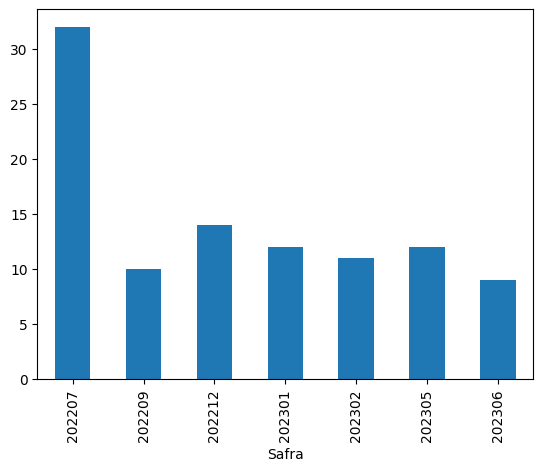

In [ ]:
df['Safra'].value_counts().sort_index()

### Safra de ref

Criando safra de referencia no formato YYYYMM: 

In [ ]:
df['safra_ref'] = '20230702'

Também podemos utilizar o formato YYYYMMDD.

### Variáveis numéricas

A partir do ID_cliente do cliente e da Safra, agrupamos as entradas e calculamos variáveis do tipo 'sum', 'mean' e 'count' que são fornecidas em forma de lista em 'operations' para variáveis numéricas. As variáveis utilizadas são listadas em 'value_var' e calculadas nas janelas de tempo em 'window' para a data de referência em 'ref_time_var'.

In [ ]:
id_cols = ['ID_cliente','Safra']
trns_time = 'Safra'
ref_time = 'safra_ref'
value_var = ['Feat_num1','Feat_num2']
window = [-1,-2,-3,-6,-9,-12,-15]
operations = ['sum','mean','count']

df_vars_num = create_vars_in_time(df,id_cols,trns_time,ref_time,value_var,window,operations)

In [ ]:
df_vars_num.head()

,ID_cliente,Safra,Feat_num1_sum_1M,Feat_num1_mean_1M,Feat_num1_count_1M,Feat_num1_sum_2M,Feat_num1_mean_2M,Feat_num1_count_2M,Feat_num1_sum_3M,Feat_num1_mean_3M,...,Feat_num2_count_6M,Feat_num2_sum_9M,Feat_num2_mean_9M,Feat_num2_count_9M,Feat_num2_sum_12M,Feat_num2_mean_12M,Feat_num2_count_12M,Feat_num2_sum_15M,Feat_num2_mean_15M,Feat_num2_count_15M
0,40,202301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.0,15.0,1.0,15.0,15.0,1.0,15,15.0,1
1,42,202302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,81.0,81.0,1.0,81.0,81.0,1.0,81,81.0,1
2,38,202301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,44.0,44.0,1.0,44.0,44.0,1.0,44,44.0,1
3,37,202207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,31.0,1
4,63,202207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,71.0,1


### Variáveis categóricas

Para variáveis categóricas, as operações são 'nunique' e mode.


In [ ]:
id_cols = ['ID_cliente','Safra']
trns_time = 'Safra'
ref_time = 'safra_ref'
value_var = ['Feat_cat']
window = [-1,-2,-3,-6,-9,-12,-15]
operations = ['nunique', mode]

df_vars_cat = create_vars_in_time(df,id_cols,trns_time,ref_time,value_var,window,operations)

In [ ]:
df_vars_cat.head()

,ID_cliente,Safra,Feat_cat_nunique_1M,Feat_cat_mode_1M,Feat_cat_nunique_2M,Feat_cat_mode_2M,Feat_cat_nunique_3M,Feat_cat_mode_3M,Feat_cat_nunique_6M,Feat_cat_mode_6M,Feat_cat_nunique_9M,Feat_cat_mode_9M,Feat_cat_nunique_12M,Feat_cat_mode_12M,Feat_cat_nunique_15M,Feat_cat_mode_15M
0,40,202301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,A,1.0,A,1,A
1,42,202302,NaN,NaN,NaN,NaN,NaN,NaN,1.0,C,1.0,C,1.0,C,1,C
2,38,202301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,C,1.0,C,1,C
3,37,202207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
4,63,202207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,C
